# EDA on Haberman Cancer Survival dataset

#### importing Relevent packages,Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
sns.set_style("whitegrid")
%matplotlib inline

#### Loading Haberman dataset downloded from 'https://www.kaggle.com/gilsousa/habermans-survival-data-set/data'  
  
#### Dataset Attribute Information
    1. Age of patient at time of operation (numerical)
    2. Patient's year of operation (year - 1900, numerical)
    3. Number of positive axillary nodes detected (numerical)
    4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

Primary objective of EDA on Habeman dataset is Classification of Survival status 


In [2]:
columns_name = ['age','year','No_Pos_Axillary_Nodes','survival_status'] # Creating column name list
Habermandf = pd.read_csv('haberman.csv',header=None,names=columns_name) #csv parser using pandas

In [3]:
#first 5 data points 
Habermandf.head()

,age,year,No_Pos_Axillary_Nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#information about dataset
Habermandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                      306 non-null int64
year                     306 non-null int64
No_Pos_Axillary_Nodes    306 non-null int64
survival_status          306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [5]:
#No of Columns and instances 
print('Shape',Habermandf.shape)
print('No of data instances',Habermandf.shape[0])
print('No of Attributes/columns',Habermandf.shape[1])

Shape (306, 4)
No of data instances 306
No of Attributes/columns 4


In [6]:
#No of classes and no of data points for each class
Habermandf.survival_status.value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [7]:
# % of classes
print('% of class 1', ' ' ,Habermandf.survival_status.value_counts().loc[1]/Habermandf.shape[0])
print('% of class 2', ' ' ,Habermandf.survival_status.value_counts().loc[2]/Habermandf.shape[0])

% of class 1   0.7352941176470589
% of class 2   0.2647058823529412


#### Observations:  
From above we can tell that our data set is imbalnce  because % of calss 2 is 0.26 and class 1 is 0.73  
our primary objective of EDA is to calssification of data to class or or class 2 i.e survived or not. and our data contains majaorty of Survived people so we have to make sure to classify Not survived(Died) people also efficiently. 

#### Univariate Anlaysis -  Histogram, PDF, CDF

In [8]:
Haberman_Survived = Habermandf.loc[Habermandf.survival_status==1] #Survived data
Haberman_NotSurvived = Habermandf.loc[Habermandf.survival_status==2] #Not Survived data

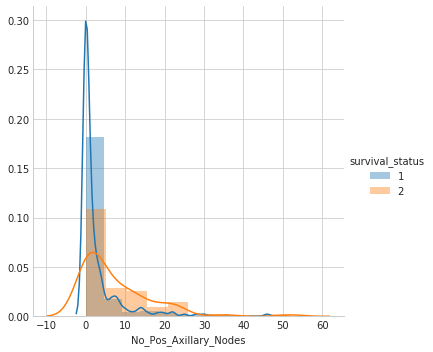

In [9]:
sns.FacetGrid(Habermandf, hue="survival_status", size=5).map(sns.distplot, "No_Pos_Axillary_Nodes",bins=10).add_legend()

In [10]:
#Grouping by survival status and getting No of positive axillary nodes 
Habermandf.groupby('survival_status')['No_Pos_Axillary_Nodes'].describe()

,count,mean,std,min,25%,50%,75%,max
survival_status,,,,,,,,
1,225.0,2.791111,5.870318,0.0,0.0,0.0,3.0,46.0
2,81.0,7.456790,9.185654,0.0,1.0,4.0,11.0,52.0


[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


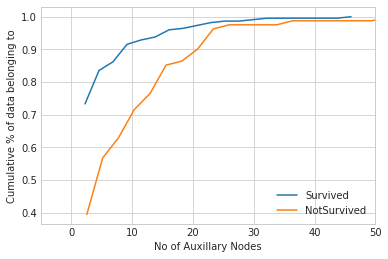

In [11]:
counts, bin_edges = np.histogram(Haberman_Survived.No_Pos_Axillary_Nodes, bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf,label='Survived')

counts, bin_edges = np.histogram(Haberman_NotSurvived.No_Pos_Axillary_Nodes, bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf,label='NotSurvived')
plt.xlabel('No of Auxillary Nodes')
plt.ylabel('Cumulative % of data belonging to')
plt.xlim(-5,50)
plt.legend()

In [80]:
print ("\nMedian Absolute Deviation")
print(robust.mad(Haberman_Survived.No_Pos_Axillary_Nodes))
print(robust.mad(Haberman_NotSurvived.No_Pos_Axillary_Nodes))
print("\n15th,20th,25th,90th Percentiles:")
print(np.percentile(Haberman_Survived.No_Pos_Axillary_Nodes,[15,20,25,90]))
print(np.percentile(Haberman_NotSurvived.No_Pos_Axillary_Nodes,[15,20,25,90]))


Median Absolute Deviation
0.0
5.930408874022408

15th,20th,25th,90th Percentiles:
[0. 0. 0. 8.]
[ 0.  0.  1. 20.]


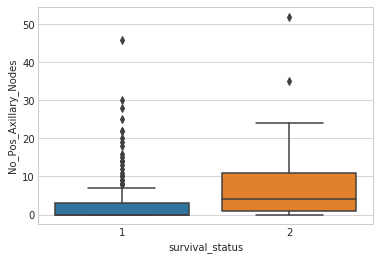

In [12]:
sns.boxplot(x='survival_status',y='No_Pos_Axillary_Nodes', data=Habermandf)

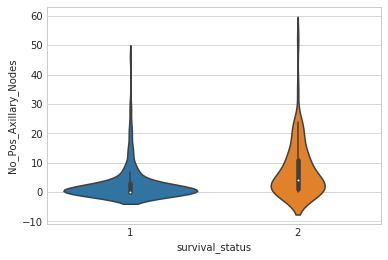

In [13]:
sns.violinplot(x='survival_status',y='No_Pos_Axillary_Nodes', data=Habermandf)

#### Observations:  
* From above analysis of Positive auxillary node for survival status we can observe like majaritoy of survived people are belonging to 0 positive auxillary nodes. and 75% data of survived people are belonging to no of auxillary nodes leass than 3.  
* We have some outliers also in both cases we can observe that from box and violin plots
* eventhough majority people who has Survived are having No of positive auxillary nodes are almost zero, about 20-25% people who died are having zero poitive auxillary nodes.

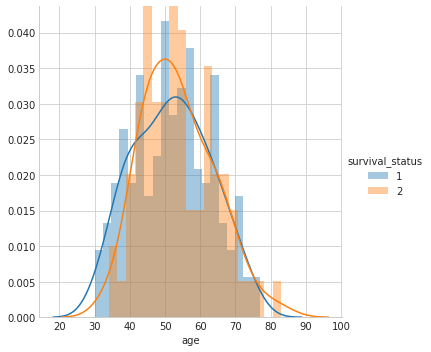

In [14]:
sns.FacetGrid(Habermandf, hue="survival_status", size=5).map(sns.distplot, "age",bins=20).add_legend()

In [15]:
Habermandf.groupby('survival_status')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
survival_status,,,,,,,,
1,225.0,52.017778,11.012154,30.0,43.0,52.0,60.0,77.0
2,81.0,53.679012,10.167137,34.0,46.0,53.0,61.0,83.0


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


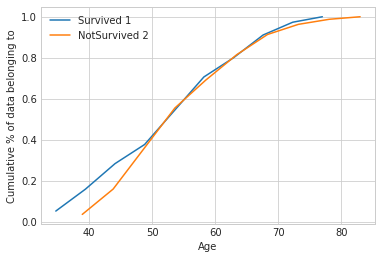

In [16]:
counts, bin_edges = np.histogram(Haberman_Survived.age, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf,label='Survived 1')

counts, bin_edges = np.histogram(Haberman_NotSurvived.age, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf,label='NotSurvived 2')
plt.xlabel('Age')
plt.ylabel('Cumulative % of data belonging to')
plt.legend()

In [17]:
print ("\nMedian Absolute Deviation")
print(robust.mad(Haberman_Survived.age))
print(robust.mad(Haberman_NotSurvived.age))


Median Absolute Deviation
13.343419966550417
11.860817748044816


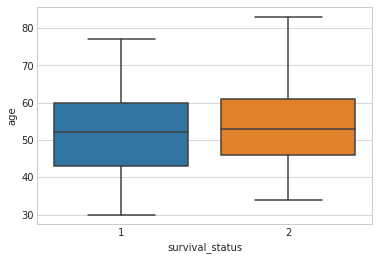

In [18]:
sns.boxplot(x='survival_status',y='age', data=Habermandf)

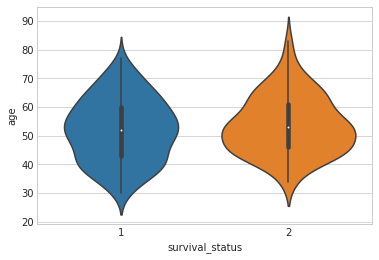

In [19]:
sns.violinplot(x='survival_status',y='age', data=Habermandf)

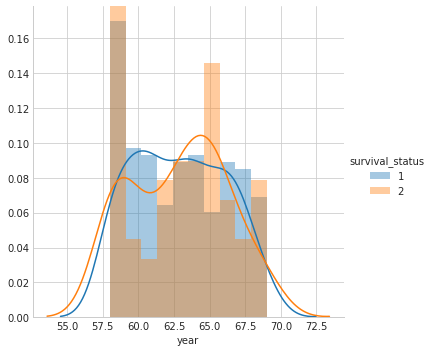

In [20]:
sns.FacetGrid(Habermandf, hue="survival_status", size=5).map(sns.distplot, "year",bins = 10).add_legend()

In [21]:
Habermandf.groupby('survival_status')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
survival_status,,,,,,,,
1,225.0,62.862222,3.222915,58.0,60.0,63.0,66.0,69.0
2,81.0,62.827160,3.342118,58.0,59.0,63.0,65.0,69.0


[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


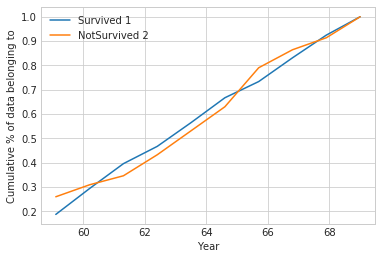

In [22]:
counts, bin_edges = np.histogram(Haberman_Survived.year, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf,label='Survived 1')

counts, bin_edges = np.histogram(Haberman_NotSurvived.year, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf,label='NotSurvived 2')
plt.xlabel('Year')
plt.ylabel('Cumulative % of data belonging to')
plt.legend()

In [23]:
print ("\nMedian Absolute Deviation")
print(robust.mad(Haberman_Survived.year))
print(robust.mad(Haberman_NotSurvived.year))


Median Absolute Deviation
4.447806655516806
4.447806655516806


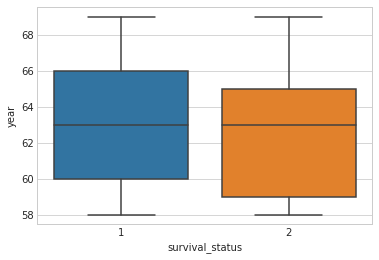

In [24]:
sns.boxplot(x='survival_status',y='year', data=Habermandf)

#### Observations:  
* From Above plots of age and year we can observe like for classification of survived or not there is so much of overlap and almost mean and median values of `year` is almost same for both catogeries.
* `age` also having so much overlap and we can observe from above graps like `age` less than 34 is survived and greater than 77 is died

#### 2-D Plots and Bi-Variate Analysis

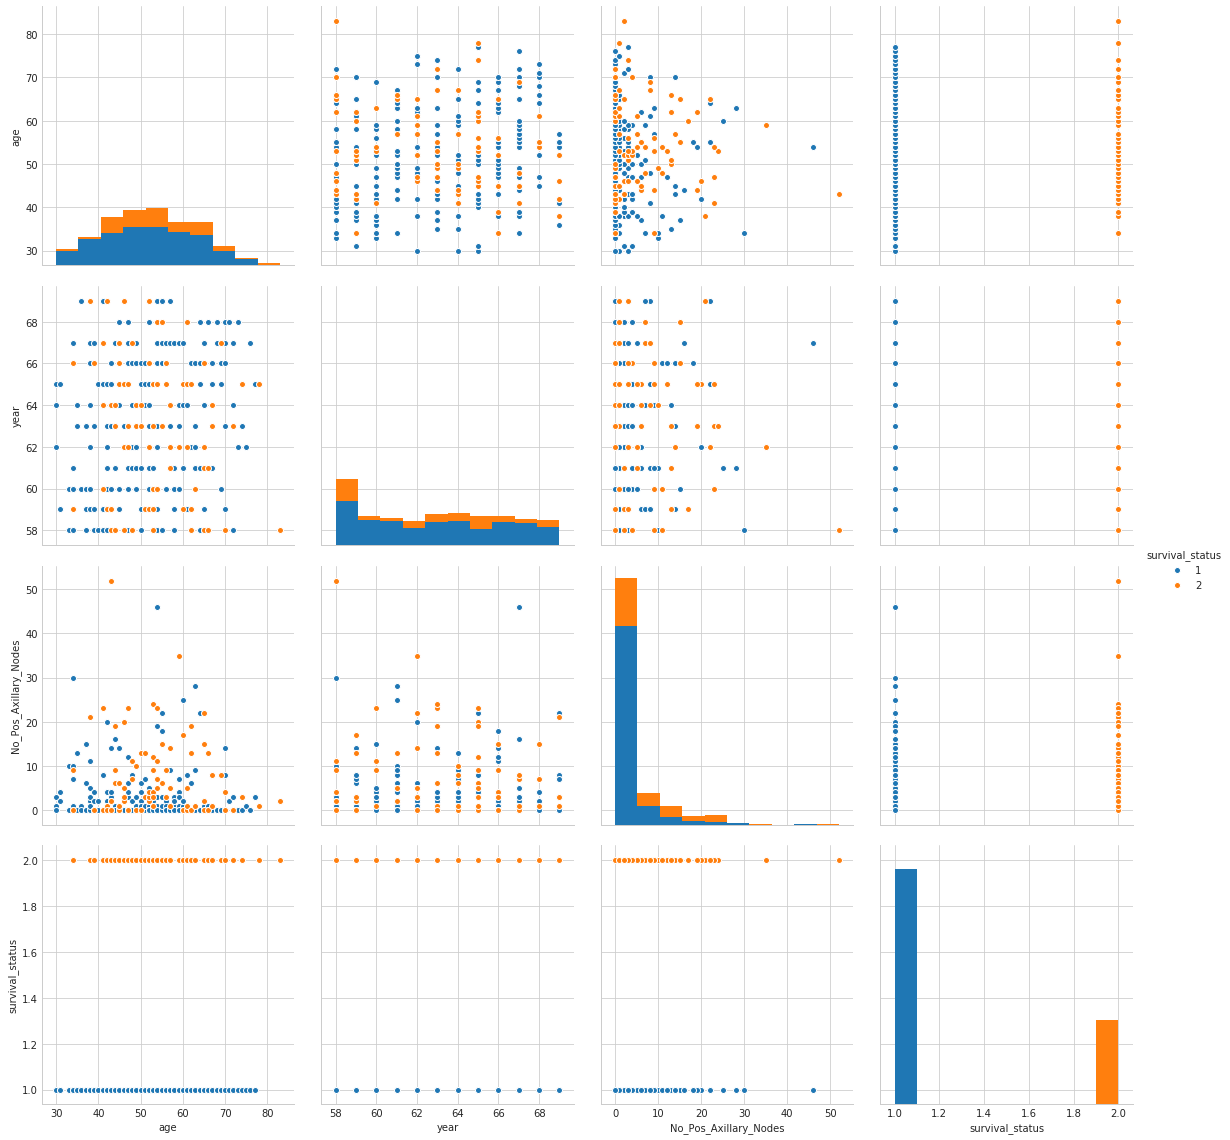

In [25]:
sns.pairplot(Habermandf, hue="survival_status", size=4)

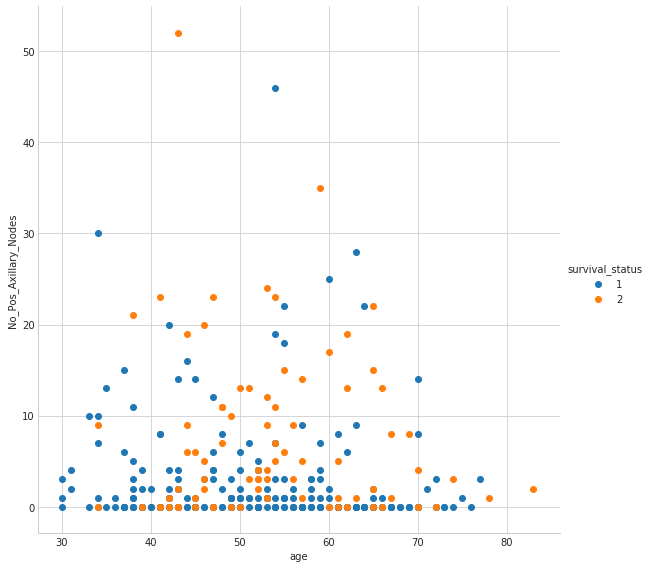

In [28]:
sns.FacetGrid(Habermandf, hue="survival_status", size=8).map(plt.scatter, "age", "No_Pos_Axillary_Nodes",marker='o').add_legend()

In [ ]:
def age_class(x):
    if x<30:
        return 1
    elif 

#### Observations:  
* From pair plot and 2D plots we can observe there is some overlap for exact classification using age and No of positive axillary nodes, but we can observe some pattern to classify and we have outliers.  
* in above observations i observed that many survived are having less than 3 

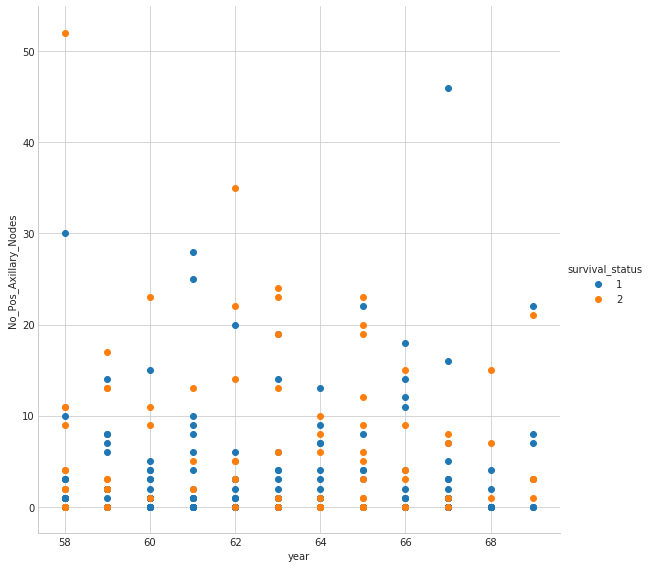

In [148]:
%matplotlib inline
sns.FacetGrid(df, hue="survival_status", size=8).map(plt.scatter, "year", "No_Pos_Axillary_Nodes",marker='o').add_legend()

In [158]:
Haberman_NotSurvived[Haberman_NotSurvived.No_Pos_Axillary_Nodes<3].age.value_counts()

43    3
45    2
61    2
65    2
41    2
42    2
47    2
63    1
34    1
67    1
70    1
39    1
72    1
46    1
62    1
49    1
50    1
83    1
52    1
53    1
57    1
66    1
60    1
78    1
Name: age, dtype: int64

In [160]:
df1 = df[df.survival_status==2]

In [164]:
df1

,age,year,No_Pos_Axillary_Nodes,survival_status,age_cat
7,34,59,0,2,1
8,34,66,9,2,1
24,38,69,21,2,2
34,39,66,0,2,2
43,41,60,23,2,3
44,41,64,0,2,3
45,41,67,0,2,3
53,42,69,1,2,3
54,42,59,0,2,3
62,43,58,52,2,3


In [163]:
df1[df1.No_Pos_Axillary_Nodes<3].age_cat.value_counts()

3     7
4     6
7     5
8     4
5     3
10    2
9     2
6     1
2     1
1     1
Name: age_cat, dtype: int64

In [155]:
Habermandf.groupby(['year','survival_status'])['No_Pos_Axillary_Nodes'].describe()

count       mean        std  min   25%   50%    75%  \
year survival_status                                                        
58   1                 24.0   2.375000   6.261077  0.0  0.00   0.5   1.25   
     2                 12.0   7.916667  14.506790  0.0  0.00   3.0   9.50   
59   1                 18.0   3.111111   3.909098  0.0  0.00   2.0   5.00   
     2                  9.0   5.888889   6.527719  0.0  2.00   3.0  13.00   
60   1                 24.0   1.750000   3.206651  0.0  0.00   1.0   2.25   
     2                  4.0  11.000000   9.092121  1.0  7.00  10.0  14.00   
61   1                 23.0   4.173913   7.726296  0.0  0.00   1.0   5.00   
     2                  3.0   6.666667   5.686241  2.0  3.50   5.0   9.00   
62   1                 16.0   2.312500   5.002916  0.0  0.00   0.5   2.25   
     2                  7.0  12.000000  12.622731  0.0  4.00   5.0  18.00   
63   1                 22.0   2.500000   4.896549  0.0  0.00   0.0   2.75   
     2                  8.0  10.750000  10.333717  0.0  0.75   9.5  20.00   
64   1                 23.0   2.086957   3.566422  0.0  0.00   0.0   2.50   
     2                  8.0   3.125000   4.189698  0.0  0.00   0.5   6.50   
65   1                 15.0   2.733333   5.836666  0.0  0.00   0.0   3.50   
     2                 13.0   7.615385   8.332051  0.0  1.00   5.0  12.00   
66   1                 22.0   2.909091   5.441543  0.0  0.00   0.0   1.75   
     2                  6.0   5.166667   5.845226  0.0  0.75   3.5   7.75   
67   1                 21.0   4.095238  10.295168  0.0  0.00   1.0   3.00   
     2                  4.0   4.000000   4.082483  0.0  0.75   4.0   7.25   
68   1                 10.0   0.600000   1.349897  0.0  0.00   0.0   0.00   
     2                  3.0   7.666667   7.023769  1.0  4.00   7.0  11.00   
69   1                  7.0   5.714286   7.931252  0.0  0.00   3.0   7.50   
     2                  4.0   7.000000   9.380832  1.0  2.50   3.0   7.50   

                       max  
year survival_status        
58   1                30.0  
     2                52.0  
59   1                14.0  
     2                17.0  
60   1                15.0  
     2                23.0  
61   1                28.0  
     2                13.0  
62   1                20.0  
     2                35.0  
63   1                19.0  
     2                24.0  
64   1                13.0  
     2                10.0  
65   1                22.0  
     2                23.0  
66   1                18.0  
     2                15.0  
67   1                46.0  
     2                 8.0  
68   1                 4.0  
     2                15.0  
69   1                22.0  
     2                21.0

<IPython.core.display.Javascript object>


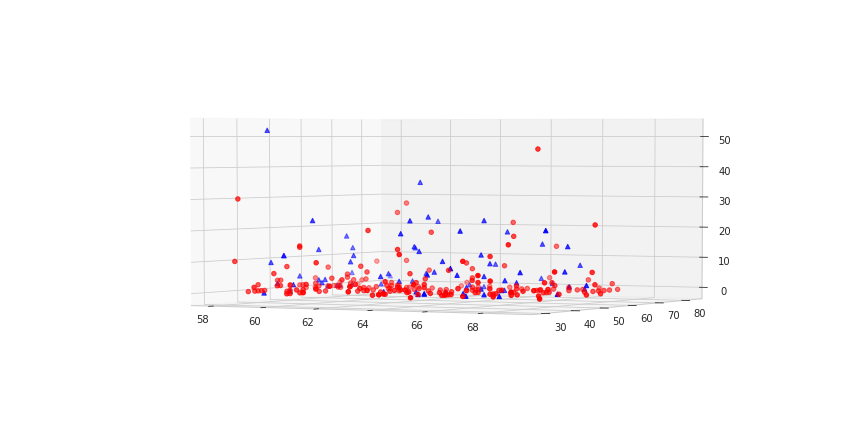

In [146]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
li1 = Habermandf.survival_status==1
li2 = Habermandf.survival_status==2
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
for c,m,ixr in [('r', 'o',li1), ('b', '^', li2)]:
    xs = Habermandf.age[ixr]
    ys = Habermandf.No_Pos_Axillary_Nodes[ixr]
    zs = Habermandf.year[ixr]
    ax.scatter(zs, xs, ys, c=c, marker=m)
#ax.scatter(Habermandf.age[li1],Habermandf.No_Pos_Axillary_Nodes,Habermandf.year)